In [1]:
import pandas as pd

In [14]:
df = pd.read_csv('data/df4.csv')

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_28339/368549848.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_long, x='year', y='Value', hue='Variable', palette='Set2', ci=None)


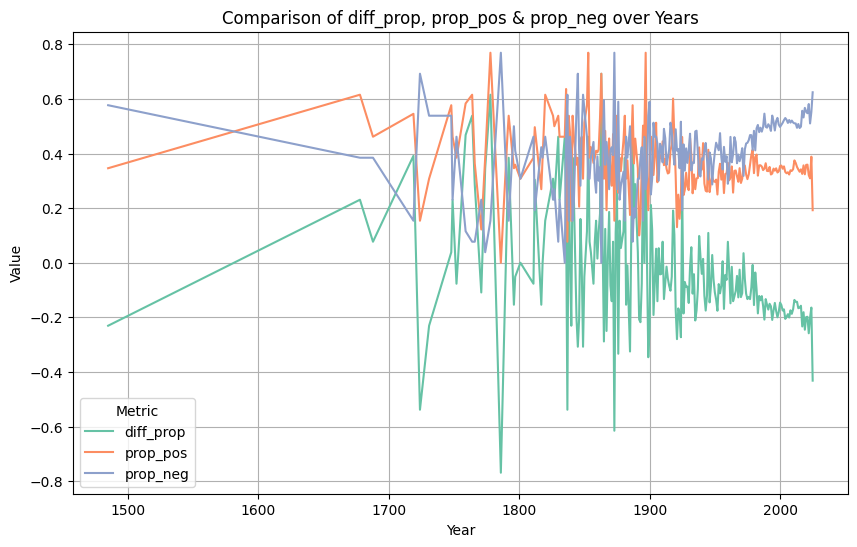

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# First, reshape to long format
df_long = df.melt(id_vars='year', value_vars=['diff_prop', 'prop_pos', 'prop_neg'],
                          var_name='Variable', value_name='Value')

# Now plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long, x='year', y='Value', hue='Variable', palette='Set2', ci=None)

plt.title('Comparison of diff_prop, prop_pos & prop_neg over Years')
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(True)
plt.legend(title='Metric')
#plt.tight_layout()
plt.show()


/Users/svenjakratzke/Desktop/Thesis/thesis/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 129782 (\N{HEART HANDS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


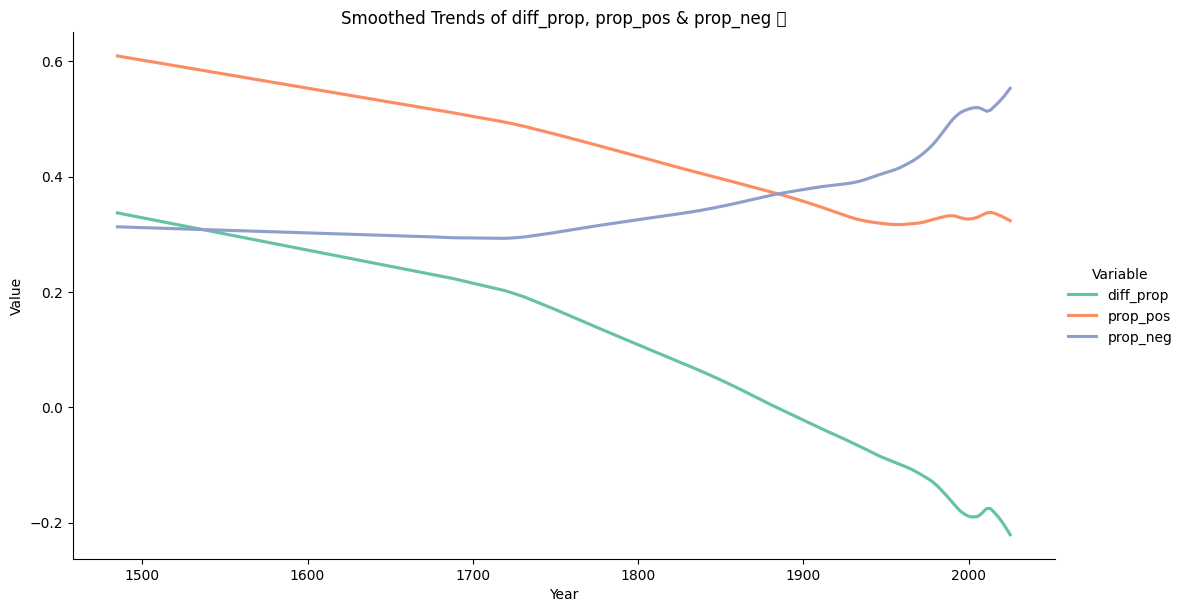

In [ ]:
import seaborn as sns
sns.lmplot(data=df_long, x='year', y='Value', hue='Variable',
           lowess=True, aspect=1.8, height=6, scatter=False, palette='Set2')

plt.title('Smoothed Trends of diff_prop, prop_pos & prop_neg')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()


/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_28339/2395630821.py:32: UserWarning: Glyph 128149 (\N{TWO HEARTS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_28339/2395630821.py:32: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/svenjakratzke/Desktop/Thesis/thesis/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128149 (\N{TWO HEARTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/svenjakratzke/Desktop/Thesis/thesis/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


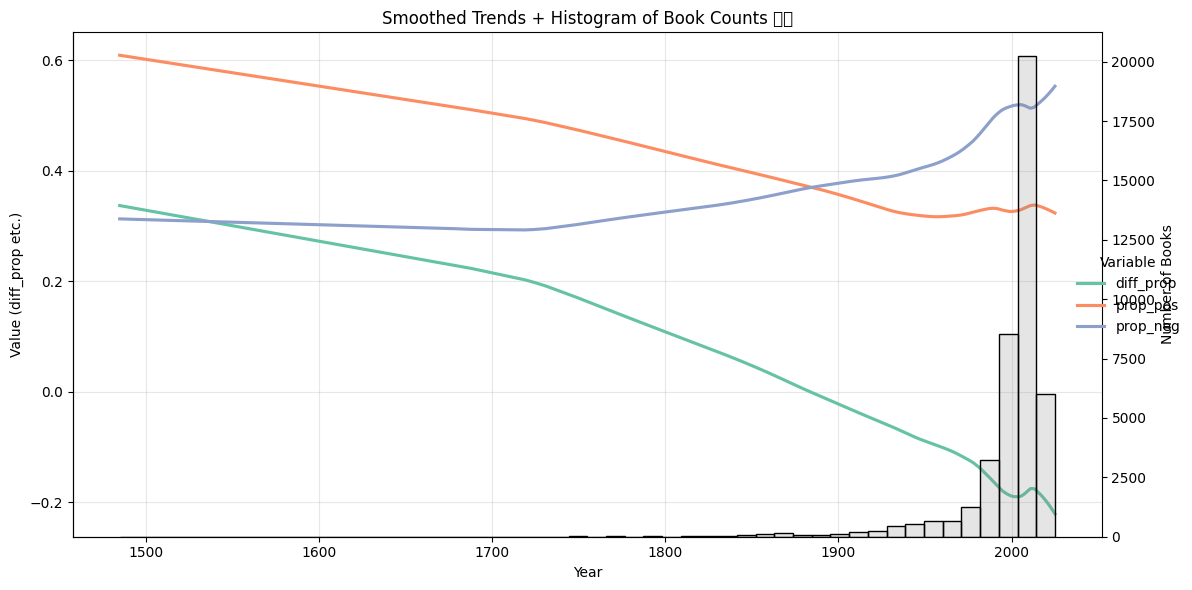

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# First, reshape to long format
df_long = df.melt(id_vars='year', value_vars=['diff_prop', 'prop_pos', 'prop_neg'],
                          var_name='Variable', value_name='Value')

# 🧮 Count books per year
year_counts = df_long['year'].value_counts().sort_index()
year_counts = year_counts.reset_index()
year_counts.columns = ['year', 'book_count']

# ✨ Create lmplot (returns a FacetGrid)
g = sns.lmplot(data=df_long, x='year', y='Value', hue='Variable',
               lowess=True, aspect=1.8, height=6, scatter=False, palette='Set2')

# 🎯 Get the axes from the FacetGrid
ax = g.ax

# 📈 Plot histogram on secondary axis
ax2 = ax.twinx()
sns.histplot(data=year_counts, x='year', weights='book_count',
             bins=50, color='gray', alpha=0.2, ax=ax2)

# 🌸 Style it
ax.set_title('Smoothed Trends + Histogram of Book Counts 💕📚')
ax.set_xlabel('Year')
ax.set_ylabel('Value (diff_prop etc.)')
ax2.set_ylabel('Number of Books')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_28339/537993004.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group.assign(Smoothed=group['Value'].rolling(window=10, min_periods=1).mean()))


/Users/svenjakratzke/Desktop/Thesis/thesis/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127800 (\N{CHERRY BLOSSOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


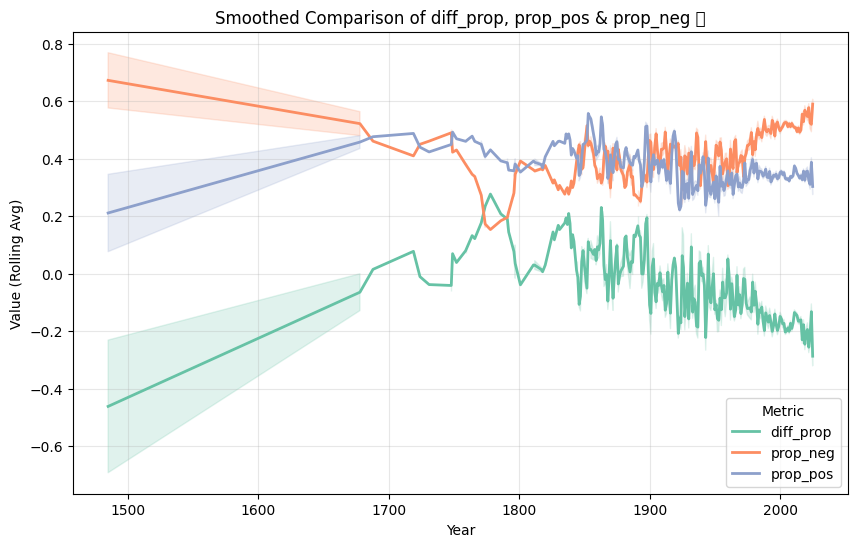

In [17]:
# Smooth each variable with a rolling average
df_smooth = (
    df_long
    .sort_values(['Variable', 'year'])  # sort before rolling
    .groupby('Variable')
    .apply(lambda group: group.assign(Smoothed=group['Value'].rolling(window=10, min_periods=1).mean()))
    .reset_index(drop=True)
)

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_smooth, x='year', y='Smoothed', hue='Variable', palette='Set2', linewidth=2)

plt.title('Smoothed Comparison of diff_prop, prop_pos & prop_neg 🌸')
plt.xlabel('Year')
plt.ylabel('Value (Rolling Avg)')
plt.grid(True, alpha=0.3)
plt.legend(title='Metric')
plt.show()


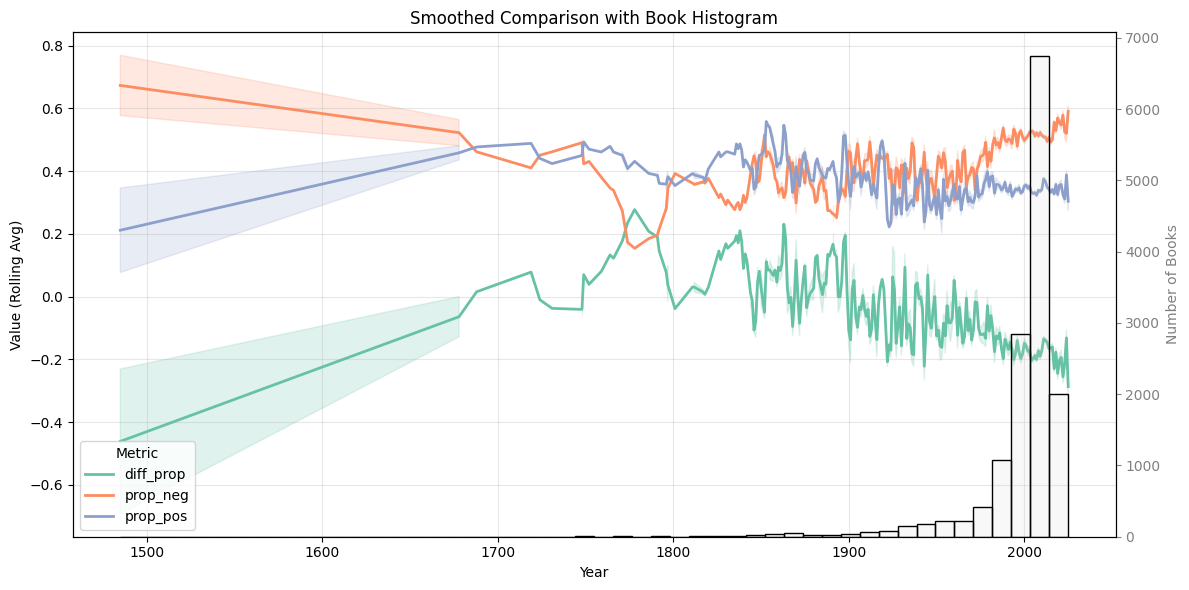

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# 📊 Count how many books per year
book_counts = df['year'].value_counts().sort_index().reset_index()
book_counts.columns = ['year', 'book_count']

# 🎨 Set up the main plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# 🎀 Lineplot: smoothed trends
sns.lineplot(data=df_smooth, x='year', y='Smoothed', hue='Variable',
             palette='Set2', linewidth=2, ax=ax1)

ax1.set_xlabel('Year')
ax1.set_ylabel('Value (Rolling Avg)', color='black')
ax1.grid(True, alpha=0.3)
ax1.set_title('Smoothed Comparison with Book Histogram')
ax1.legend(title='Metric', loc='lower left')

# 🌫️ Add histogram using a second y-axis
ax2 = ax1.twinx()
sns.histplot(data=book_counts, x='year', weights='book_count',
             bins=50, color='lightgray', alpha=0.15, ax=ax2)

ax2.set_ylabel('Number of Books', color='gray')
ax2.tick_params(axis='y', colors='gray')

plt.tight_layout()
plt.show()


/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_28339/3845184889.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_diff_long, x='year', y='Value', hue='author_gender', palette='Set2', ci=None)
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_28339/3845184889.py:20: UserWarning: Glyph 128150 (\N{SPARKLING HEART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/svenjakratzke/Desktop/Thesis/thesis/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128150 (\N{SPARKLING HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


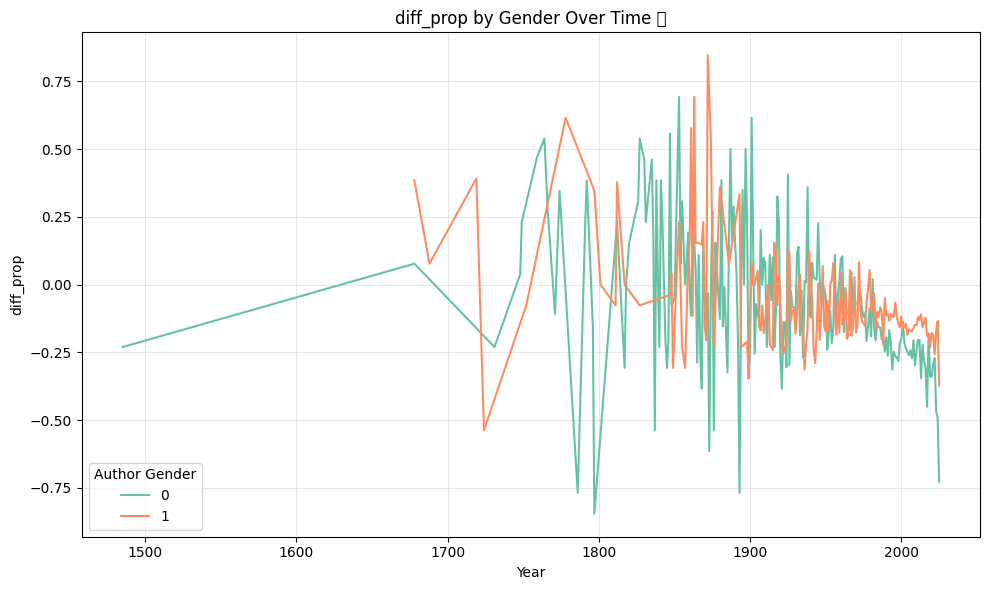

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Smooth each variable with a rolling average
df_smooth = (
    df_long
    .sort_values(['Variable', 'year'])  # sort before rolling
    .groupby('Variable')
    .apply(lambda group: group.assign(Smoothed=group['Value'].rolling(window=10, min_periods=1).mean()))
    .reset_index(drop=True)
)

# 🫶 Filter to just diff_prop
df_diff = df[df['diff_prop'].notna()]  # keep only non-NA values if needed

# 🌸 Prepare long format (optional if already long)
df_diff_long = df_diff[['year', 'author_gender', 'diff_prop']].copy()
df_diff_long = df_diff_long.rename(columns={'diff_prop': 'Value'})

# 🎀 Plot!
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_diff_long, x='year', y='Value', hue='author_gender', palette='Set2', ci=None)
# 🎀 Lineplot: smoothed trends
sns.lineplot(data=df_smooth, x='year', y='Smoothed', hue='Variable',
             palette='Set2', linewidth=2, ax=ax1)

plt.title('diff_prop by Gender Over Time 💖')
plt.xlabel('Year')
plt.ylabel('diff_prop')
plt.grid(True, alpha=0.3)
plt.legend(title='Author Gender', loc='lower left')
plt.tight_layout()
plt.show()


/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_28339/616251567.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda g: g.assign(Smoothed=g['prop_neg'].rolling(window=10, min_periods=1).mean()))
/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_28339/616251567.py:26: UserWarning: Glyph 128150 (\N{SPARKLING HEART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/svenjakratzke/Desktop/Thesis/thesis/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128150 (\N{SPARKLING HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


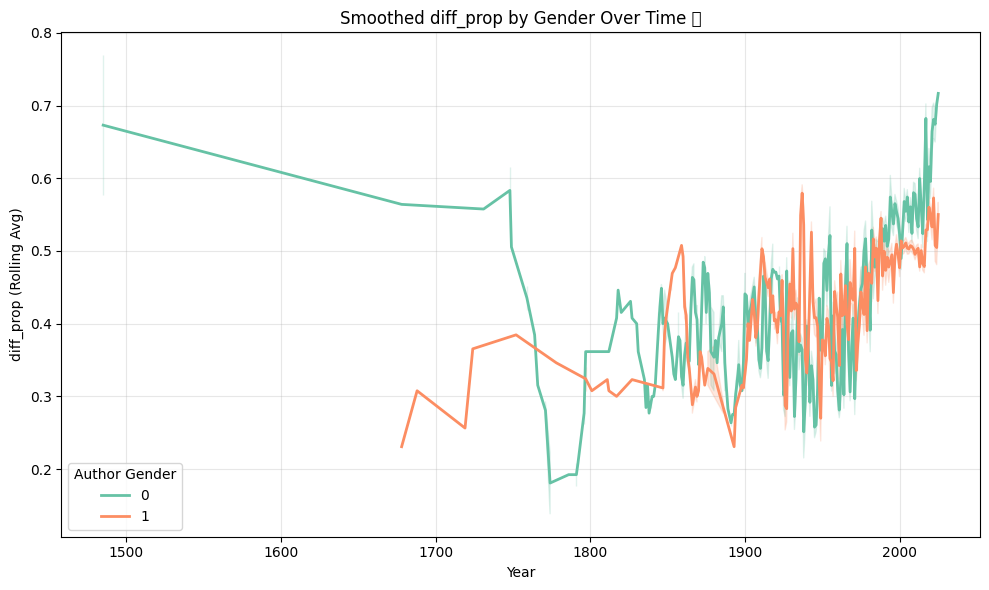

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 🎀 Filter to just diff_prop and drop missing
df_diff = df[['year', 'author_gender', 'prop_neg']].dropna()

# ✨ Sort and apply rolling average for smoothing (per gender)
df_smooth = (
    df_diff
    .sort_values(['author_gender', 'year'])
    .groupby('author_gender')
    .apply(lambda g: g.assign(Smoothed=g['prop_neg'].rolling(window=10, min_periods=1).mean()))
    .reset_index(drop=True)
)

# 🎨 Plot the smoothed lines
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_smooth, x='year', y='Smoothed', hue='author_gender', palette='Set2', linewidth=2)

plt.title('Smoothed diff_prop by Gender Over Time 💖')
plt.xlabel('Year')
plt.ylabel('diff_prop (Rolling Avg)')
plt.grid(True, alpha=0.3)
plt.legend(title='Author Gender', loc='lower left')
plt.tight_layout()
plt.show()
